**Módulo 4:** Trabajando con bases de datos

## Configuración de una Base de Datos MySQL
---

### Instalando un servidor de base de datos SQL (MySQL, MariaDB, SQLite3)

Existen muchas variantes de servidores de bases de datos SQL (Oracle, Microsoft, Amazon, Google, PosgreSQL, etc) así que para poder hacer uso de una Base de Datos SQL (Structured Query Language) se requiere de un motor de bases de datos como los ya mencionados.

Para ésta práctica si el equipo cuenta con 4GB en ram y 2 GB de espacio libre en disco se sugiera instalar MySQL Server que se puede descargar la versión comunitaria desde el sitio oficial mysql.com o para Windows directamente desde éste [link](https://dev.mysql.com/downloads/installer/).

También se puede seguir la siguiente [guía en vídeo](https://www.youtube.com/watch?v=kfdGLKNBCnY) para instalar MySQL Server en Windows o [ésta otra guía](https://www.youtube.com/watch?v=AP-LloZZhTM)

Si usas Linux o MaxOS podrías seguir el [siguiente tutorial](https://rctorr.wordpress.com/2019/12/07/instalando-mariadb-en-ubuntu-18-04/) o si eres usuario de Docker también puedes seguir la [siguiente guía](https://mariadb.com/kb/en/installing-and-using-mariadb-via-docker/)

Si no cuentas con los recursos en memoria ram o espacio en disco, entonces puedes instalar el motor de base de datos SQLite3 desde su [sitio printipal](https://www.sqlite.org), se recomienda descargar el archivo `sqlite-tools-win32-x86-3430000.zip` para Windows y descomprimir dentro de la carpeta del `Módulo-4/`, en el caso de MacOS se puede ejercutar el comando `brew install sqlite3` y para Linux generalmente ya está instalado, pero si fuera necesario para el caso de distros tipo Ubuntu se puede usar el comando `sudo apt install sqlite3`.

Sin embargo si se ha instalado Miniconda Python el comando `sqlite3` está incluido en la instalación de Miniconda.

### Validando la conexión a un servidor de base de datos SQL

Después de realizar una instalación de MySQL (o similar) se deberá de contar con los siguientes datos de acceso:

- Host: Nombre o dirección IP del servidor (mi.servidor.amazon.com) o si se ha instalado en el mismo equipo se puede usar la dirección IP `127.0.0.1`
- User: Nombre del usario para validar que se tiene acceso a la base de datos, si es un servidor recién instalado el usuario puede ser `root` en caso contrario es necesario conseguir un usuario.
- Password: La clave asociada al usuario anterior
- DBName: Es el nombre de la base de datos a la que nos vamos a conectar, si el servidor es recién instalado es posible que no existe una BD, así que primero habrá que crear una u luego haremos uso de ella. **Nota:** En el caso de SQLite3 éste es el único dato que se requiere y es obligarorio definir una base de datos de inicio.
- Port: Puerto de conexión a la base de datos, por ejemplo para MySQL el puerto por omisión es el 3306, generalmente no es necesario especificarlo, pero si la configurción se cambió durante la instalación será necesario proporcionarlo.

Considerando que has realizado la instalación de MySQL o BariaDB Server en tu propio equipo, los datos de conexión de que deberías tener son:

- host: 127.0.0.1
- user: root
- password: definido durante la instalación (intel082023)
- dbname:
- port:

Con lo anterior abrir una consola o terminal y ejecutar el comando siguiente:

```sh
(base) rctorr@fibo:~$ mysql -h127.0.0.1 -uroot -p 
Enter password: 
Welcome to the MariaDB monitor.  Commands end with ; or \g.
Your MariaDB connection id is 11
Server version: 11.1.2-MariaDB-1:11.1.2+maria~ubu2204 mariadb.org binary distribution

Copyright (c) 2000, 2018, Oracle, MariaDB Corporation Ab and others.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

MariaDB [(none)]> SELECT version();
+---------------------------------------+
| version()                             |
+---------------------------------------+
| 11.1.2-MariaDB-1:11.1.2+maria~ubu2204 |
+---------------------------------------+
1 row in set (0.000 sec)

MariaDB [(none)]> quit
Bye
(base) rctorr@fibo:~$ 
```

Si estás usando usando una base de datos de tipo SQLite3 los datos que necesitas son los siguientes:

- dbname: peliculas.sqlite3

Qué en éste caso representa el nombre de un archivo y para validar el correcto funcionamiento en una consola o terminal cambiate a la carpeta del Módulo-4 y ejecuta el comando:

```sh
(base) rctorr@fibo:~$ cd Ciencia-de-datos/Módulo-4/
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ sqlite3 peliculas.sqlite3
SQLite version 3.41.2 2023-03-22 11:56:21
Enter ".help" for usage hints.
sqlite> .version
SQLite 3.41.2 2023-03-22 11:56:21 0d1fc92f94cb6b76bffe3ec34d69cffde2924203304e8ffc4155597af0c191da
zlib version 1.2.13
gcc-11.2.0
sqlite> .quit
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ 
```

Lo anterior crea una base de datos llamada `peliculas.sqlite3`

## Uso de una Base de Datos SQL: Línea de Comandos
---

### Inicializando una base de datos tipo MySQL

Si has realizado la instalación de un nuevo servidor MySQL entonces deberás de realizar unos pasos extras y consisten en:
- Crear un usuario
- Crear una base de datos
- Asignar permisos el usuario para que pueda hacer uso de la base de datos

Para ello abrimos una consola o terminal y ejecutamos los soguientes comandos:

```sql
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ mysql -h127.0.0.1 -uroot -p 
Enter password: 
Welcome to the MariaDB monitor.  Commands end with ; or \g.
Your MariaDB connection id is 12
Server version: 11.1.2-MariaDB-1:11.1.2+maria~ubu2204 mariadb.org binary distribution

Copyright (c) 2000, 2018, Oracle, MariaDB Corporation Ab and others.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

MariaDB [(none)]> CREATE USER 'intel'@'127.0.0.1' IDENTIFIED BY 'intel082023';
Query OK, 0 rows affected (0.001 sec)

MariaDB [(none)]> CREATE DATABASE intel;
Query OK, 1 row affected (0.000 sec)

MariaDB [(none)]> GRANT ALL ON intel.* TO 'intel'@'%';
Query OK, 0 rows affected (0.002 sec)

MariaDB [(none)]> quit
Bye
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ 
```

Ahora entonces ya contamos con los datos:
- host: 127.0.0.1
- user: intel
- password: intel082023
- dbname: intel

Y para validar su correcta creación en la misma consola o terminal nos conectamos al servidor con estos datos y creamos la siguiente tabla llamada `Pelicula`:

| Pelicula | |
| :-: | :-: |
| id | Identificado de película |
| titulo | Título de la película |
| descripcion | Descripción de la película |

```sql
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ mysql -h127.0.0.1 -uintel -p 
Enter password: 
Welcome to the MariaDB monitor.  Commands end with ; or \g.
Your MariaDB connection id is 17
Server version: 11.1.2-MariaDB-1:11.1.2+maria~ubu2204 mariadb.org binary distribution

Copyright (c) 2000, 2018, Oracle, MariaDB Corporation Ab and others.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

MariaDB [(none)]> USE intel;
Database changed

MariaDB [intel]> CREATE TABLE pelicula (
    -> id INT NOT NULL AUTO_INCREMENT,
    -> titulo VARCHAR(255) NOT NULL,
    -> descripcion VARCHAR(1000) NOT NULL,
    -> PRIMARY KEY (id)
    -> );
Query OK, 0 rows affected (0.007 sec)

MariaDB [intel]> SHOW TABLES;
+-----------------+
| Tables_in_intel |
+-----------------+
| pelicula        |
+-----------------+
1 row in set (0.001 sec)

MariaDB [intel]> DROP TABLE pelicula;
Query OK, 0 rows affected (0.039 sec)

MariaDB [intel]> SHOW TABLES;
Empty set (0.001 sec)

MariaDB [intel]> quit
Bye
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ 
```

O para el caso de SQLite3:

```sql
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ sqlite3 peliculas.sqlite3
SQLite version 3.41.2 2023-03-22 11:56:21
Enter ".help" for usage hints.

sqlite> CREATE TABLE pelicula (
(x1...> id INTEGER PRIMARY KEY AUTOINCREMENT,
(x1...> titulo VARCHAR(255) NOT NULL,
(x1...> descripcion VARCHAR(1000) NOT NULL
(x1...> );

sqlite> .tables
pelicula

sqlite> DROP TABLE pelicula;

sqlite> .tables

sqlite> .quit
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ 
```

En ambos caso hemos creado la tabla `pelicula` y la hemos eliminado.

**Ejemplo:** Realizando una serie de operaciones CRUD (Create, Read, Update y Delete) creando la tabla `EstadoMx` que contenga la siguiente estructura y agregar algunos registros, consulta los registros agregados, actualiza algún registro y elimina un registro.

| EstadoMx | |
| :-: | :-: |
| id | Identificado consecutivo de estado |
| nombre | Nombre completo del estado |
| codigoIso | Código ISO del estado |


```sql
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ sqlite3 estados-mx.sqlite3
SQLite version 3.41.2 2023-03-22 11:56:21
Enter ".help" for usage hints.
sqlite> CREATE TABLE EstadoMx (
(x1...> id INTEGER PRIMARY KEY AUTOINCREMENT,
(x1...> nombre VARCHAR(30) NOT NULL,
(x1...> codigoIso VARCHAR(5) NOT NULL
(x1...> );
sqlite> .tables
EstadoMx
sqlite> INSERT INTO EstadoMx (nombre, codigoIso) VALUES ("Aguascalientes","MX-AGU");
sqlite> INSERT INTO EstadoMx (nombre, codigoIso) VALUES ("Baja California","MX-BCN");
sqlite> INSERT INTO EstadoMx (nombre, codigoIso) VALUES ("Baja California Sur","MX-BCS");
sqlite> INSERT INTO EstadoMx (nombre, codigoIso) VALUES ("Campeche","MX-CAM");
sqlite> SELECT * FROM EstadoMx;
1|Aguascalientes|MX-AGU
2|Baja California|MX-BCN
3|Baja California Sur|MX-BCS
4|Campeche|MX-CAM
sqlite> INSERT INTO EstadoMx (nombre, codigoIso) VALUES ("Chiapas","MX-CHI");
sqlite> SELECT * FROM EstadoMx;
1|Aguascalientes|MX-AGU
2|Baja California|MX-BCN
3|Baja California Sur|MX-BCS
4|Campeche|MX-CAM
5|Chiapas|MX-CHI
sqlite> UPDATE EstadoMx SET codigoIso="MX-CHP" WHERE id=5;
sqlite> SELECT * FROM EstadoMx;
1|Aguascalientes|MX-AGU
2|Baja California|MX-BCN
3|Baja California Sur|MX-BCS
4|Campeche|MX-CAM
5|Chiapas|MX-CHP
sqlite> INSERT INTO EstadoMx (nombre, codigoIso) VALUES ("Cuahutemoc","MX-CUA");
sqlite> SELECT * FROM EstadoMx;
1|Aguascalientes|MX-AGU
2|Baja California|MX-BCN
3|Baja California Sur|MX-BCS
4|Campeche|MX-CAM
5|Chiapas|MX-CHP
6|Cuahutemoc|MX-CUA
sqlite> DELETE FROM EstadoMx WHERE id=6;
sqlite> SELECT * FROM EstadoMx;
1|Aguascalientes|MX-AGU
2|Baja California|MX-BCN
3|Baja California Sur|MX-BCS
4|Campeche|MX-CAM
5|Chiapas|MX-CHP
sqlite> .quit
(base) rctorr@fibo:~/Ciencia-de-datos/Módulo-4$ 
```

### Relaciones en una base de datos tipo SQL

Una de las características en una base de datos SQL es que se pueden relacionar dos o más tablas y ésto permite hacer consultas de información más interesantes y sobre todo involucrando dos o más tablas.

Asío que para hablar de relaciones necesitamos dos o más tablas, vamos a usar un ejemplo acerca de una tienda en línea donde los clientes realizan pedido que incluye uno o más productos, así que para ellos se ha diseñado una base de datos SQL con las siquientes tablas:

- Clientes
- Pedidos
- Productos
- Articulos_de_pedido

Cada tabla necesita de atributos que definen la información necesaria a almacenar para cada tabla, los atributos también se pueden considerar campos o columnas y cada registro nuevo también puede ser una nueva fila o renglón, de tal forma que una tabla en SQL sería muy similar a una hoja de cálculo.

Para ayudar a visualizar y comprender mejor la información de una base de datos SQL generalmente se hace uso del diagrama de **entidad-relación** y para nuestro caso sería:

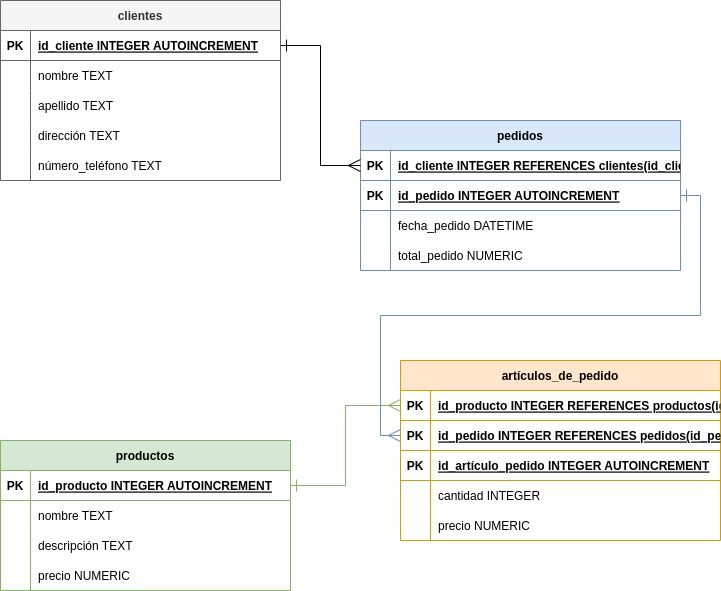

### Consultas a dos tablas de una base de datos SQL (JOIN's)

Finalmente uno de los mayores problemas es extraer información de una base de datos en donde es necesario vincular dos o más tablas, por ejemplo si hacemos una consulta a la tabla **Pedidos** obtendríamos algo como lo siguiente:

| id_pedido | fecha_pedido | total_pedido | id_cliente |
|---|---|---|---|
| 1 | 2023-08-31 12:00:00 | 1000 | 1 |
| 2 | 2023-08-31 13:00:00 | 2000 | 2 |
| 3 | 2023-08-31 14:00:00 | 3000 | 3 |
| 4 | 2023-08-31 15:00:00 | 4000 | 4 |
| 5 | 2023-08-31 16:00:00 | 5000 | 5 |

Puedes verificar esto ejecuanto el siguiente comando SQL:

`SELECT * FROM pedidos;`

En el resultado anterior la columna `id_cliente` sólo es un número que hace referencia al un cliente, pero si necesitamos obtener su nombre, tendríamos que buscarlo en la tabla `Clientes` usando el valor del id correspondiente, por ejemplo para el valor 1 de `id_cliente` buscando en la tabla `Clientes`:

| id_cliente | nombre | apellido | dirección | número_teléfono |
|---|---|---|---|---|
| 1 | Juan | Pérez | Calle 123, Ciudad de México | 555-555-5555 |
| 2 | María | García | Avenida 456, Monterrey | 81-8181-8181 |
| 3 | Pedro | López | Calle 789, Guadalajara | 33-3333-3333 |
| 4 | Sofía | Romero | Avenida 1012, Puebla | 22-2222-2222 |
| 5 | Luis | Martínez | Calle 1314, Veracruz | 228-2282-2282 |

Puedes verificar el contenido de la tabla con el siguinete comando SQL:

`SELECT * FROM clientes;`

Tendríamos que el serìa el primer registro y el nombre es `Juan Pérez` y eso tendríamos que hacer para cada registro, tomar el `id_cliente` de la tabla `Pedidos` y buscarlo en la tabla `Clientes` en SQL para realizar ésta tarea de **enlazar** dos tablas se hace usando el comando **JOIN** y vamos a realizar justo lo que mencionamos, vamos a agregar una columna más a nuestro resultado para incluir el nombre del cliente.

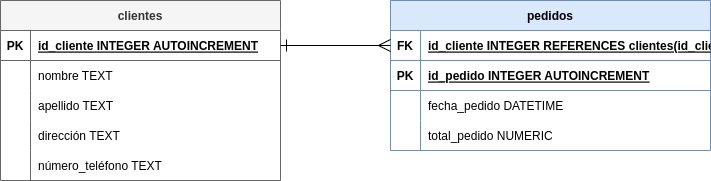

Para lo anterior vamos a usar la siguiente combinación de comandos SELECT, JOIN:

```
SELECT * FROM pedidos LEFT JOIN clientes ON pedidos.id_cliente = clientes.id_cliente;
```

Lo que debería de dar un resultado similar al siguiente:

| id_pedido | fecha_pedido | total_pedido | id_cliente | nombre |
|---|---|---|---|---|
| 1 | 2023-08-31 12:00:00 | 1000 | 1 | Juan Pérez |
| 2 | 2023-08-31 13:00:00 | 2000 | 2 | María García |
| 3 | 2023-08-31 14:00:00 | 3000 | 3 | Pedro López |
| 4 | 2023-08-31 15:00:00 | 4000 | 4 | Sofía Romero |
| 5 | 2023-08-31 16:00:00 | 5000 | 5 | Luis Martínez |

**Ejemplo:** Ejecuta las instrucciones SQL para comprobar el resultado anterior.

**Nota:** Para que una consulta entre tablas funciona no debe haber problemas de integridad en la base de datos, ya que de lo contrario se podrían obtener resultados inesperados.

## Uso de una Base de Datos MySQL: Python
---

Ahora pasamos a revisar el procedimiento para hacer uso de la base de datos desde Python y para ello necesitamos del módulo que nos facilite trabajar con el motor de base de datos seleccionado, en éste caso usaremos dos módulos, uno para SQLite3 y otro para MySQL / MariaDB.

- SQLite3: `import sqlite3` ([Documentación(https://docs.python.org/3/library/sqlite3.html))
- MySQL / MariaDB: `import mysql.connector` ([Documentación](https://dev.mysql.com/doc/connector-python/en/connector-python-introduction.html))

En el caso del módulo para SQLite3 ya es parte de la librería estándar de Python, así que no es necesario instalar nada más.

Para el caso de MySQL / MariaDB existen varios módulos que pueden ayudar pero siguiendo la documentación de la página oficial de MySQL recomienda instalar el módulo `mysql-connector-python` así que pasamos a su instalación:

In [1]:
!pip install mysql-connector-python

  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/55/8e/1270601b42d40c4fb0191fd9043430889510bdbc711c482b12e6f66099e2/mysql_connector_python-8.1.0-cp311-cp311-manylinux_2_17_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 9.3 MB/s eta 0:00:000m eta 0:00:010:00:01


### Conectando a una base de datos y ejecutando consultas

In [3]:
def print_table(datos, a_cols=None):
    """ Imprime una tabla a partir de una lista de listas contenida en datos
    y el atributo opcional a_cols es una lista con el ancho de cada columna """
    if a_cols == None:
        a_cols = [5] * len(datos[0])
    datos_str = [[str(col) for col in fila] for fila in datos]
    datos_fila = [[f"{col:{a_col}}" for col, a_col in zip(fila, a_cols)] for fila in datos]  # fila -> ["Aguas..", "MX-AGU"], a_cols -> [5, 5]
    # [["Aguascalientes  ", "MX-AGU    "]  -> "Aguascalientes   | MX-AGU    "
    filas_str = [" | ".join(fila) for fila in datos_fila]
    tabla = "\n".join(filas_str)
    print(tabla)
    

Para realizar una conexión a una base de datos **SQLite3** es necesario sólo conocer el nombre de la base de datos que es equivalente a conocer el nombre del archivo de la base de datos, en éste caso vamos a usar la base de datos ya creada `clientes-pedidos.sqlite3` y para realizar la conexión usamos la siguiente secuencia:

```python
import sqlite3

conn = sqlite3.connect("clientes-pedidos.sqlite3")
cur = conn.cursor()

cur.close()
conn.close()
```

Pero ésto sólo abre una conexión y un ejecutor hacia la base de datos vamos a realizar una consulta, por ejemplo vamos a obtener todos los registros de la tabla `Clientes`:

```python
sql = "SELECT * FROM clientes"
cur.execute(sql)
datos = cur.fetchall()
print_table(datos, [2, 6, 8, 30, 12])
```

In [10]:
import sqlite3
from pprint import pprint

conn = sqlite3.connect("clientes-pedidos.sqlite3")
cur = conn.cursor()

sql = "SELECT * FROM clientes"
cur.execute(sql)
datos = cur.fetchall()
print_table(datos, [2, 6, 8, 30, 12])
print()
pprint(datos)

cur.close()
conn.close()

 1 | Juan   | Pérez    | Calle 123, Ciudad de México    | 555-555-5555
 2 | María  | García   | Avenida 456, Monterrey         | 81-8181-8181
 3 | Pedro  | López    | Calle 789, Guadalajara         | 33-3333-3333
 4 | Sofia  | Romero   | Avenida 1012, Puebla           | 22-2222-2222
 5 | Luis   | Martínez | Calle 1314, Veracruz           | 228-2282-2282

[(1, 'Juan', 'Pérez', 'Calle 123, Ciudad de México', '555-555-5555'),
 (2, 'María', 'García', 'Avenida 456, Monterrey', '81-8181-8181'),
 (3, 'Pedro', 'López', 'Calle 789, Guadalajara', '33-3333-3333'),
 (4, 'Sofia', 'Romero', 'Avenida 1012, Puebla', '22-2222-2222'),
 (5, 'Luis', 'Martínez', 'Calle 1314, Veracruz', '228-2282-2282')]


Para realizar una conexión a una base de datos **MySQL / MariaDB** es necesario sólo conocer además del nombre de la base de datos, los datos de conexión que ya se habían usando con el comando `mysql`, así que arealizar la conexión usamos los siguiente:

```python
import mysql.connector

datos_db = {
    user: "intel",
    host: "127.0.0.1",
    password: "intel082023",
    database: "intel"
}

conn = mysql.connector.connect(**datos_db)
cur = conn.cursor()

cur.close()
conn.close()
```

Pero ésto sólo abre una conexión justo similar a SQLite3 y para ejecutar la consulta para obtener todos los registros de la tabla `Clientes` ejecutamos:

```python
sql = "SELECT * FROM clientes"
cur.execute(sql)
datos = cur.fetchall()
print_table(datos, [2, 6, 8, 30, 12])
```

In [17]:
import mysql.connector

datos_db = {
    "user": "intel",
    "host": "192.168.1.66",
    "password": "intel082023",
    "database": "intel"
}

conn = mysql.connector.connect(**datos_db)
cur = conn.cursor()

sql = "SELECT * FROM clientes"
cur.execute(sql)
datos = cur.fetchall()
print_table(datos, [2, 6, 8, 30, 12])
print()
pprint(datos)

cur.close()
conn.close()

 1 | Juan   | Pérez    | Calle 123, Ciudad de México    | 555-555-5555
 2 | María  | García   | Avenida 456, Monterrey         | 81-8181-8181
 3 | Pedro  | López    | Calle 789, Guadalajara         | 33-3333-3333
 4 | Sofia  | Romero   | Avenida 1012, Puebla           | 22-2222-2222
 5 | Luis   | Martínez | Calle 1314, Veracruz           | 228-2282-2282
 6 | Juan   | Pérez    | Calle 123, Ciudad de México    | 555-555-5555
 7 | María  | García   | Avenida 456, Monterrey         | 81-8181-8181
 8 | Pedro  | López    | Calle 789, Guadalajara         | 33-3333-3333
 9 | Sofia  | Romero   | Avenida 1012, Puebla           | 22-2222-2222
10 | Luis   | Martínez | Calle 1314, Veracruz           | 228-2282-2282

[(1, 'Juan', 'Pérez', 'Calle 123, Ciudad de México', '555-555-5555'),
 (2, 'María', 'García', 'Avenida 456, Monterrey', '81-8181-8181'),
 (3, 'Pedro', 'López', 'Calle 789, Guadalajara', '33-3333-3333'),
 (4, 'Sofia', 'Romero', 'Avenida 1012, Puebla', '22-2222-2222'),
 (5, 'Luis', 'Martí

**Ejercicio:** Realiza la consulta donde se hace uso del JOIN para obtener la lista de pedidos incluyendo el nombre del cliente. Como requerimiento extra, haz que el nombre sea un sólo campo en tu variable de `tabla` final obteniendo algo similar a los siguiente:

| id | fecha | cantidad | id_cliente | nombre |
| - | ------------------- | ----- | ----- | ---------- |
| 1 | 2023-08-31 12:00:00 |  1000 |     1 | Juan Pérez |
| 2 | 2023-08-31 13:00:00 |  2000 |     2 | María García |
| 3 | 2023-08-31 14:00:00 |  3000 |     3 | Pedro López |
| 4 | 2023-08-31 15:00:00 |  4000 |     4 | Sofia Romero |
| 5 | 2023-08-31 16:00:00 |  5000 |     5 | Luis Martínez |

In [28]:
import sqlite3
from pprint import pprint

conn = sqlite3.connect("clientes-pedidos.sqlite3")
cur = conn.cursor()

sql = "SELECT pedidos.*, clientes.nombre, clientes.apellido FROM pedidos LEFT JOIN clientes ON clientes.id_cliente=pedidos.id_cliente"
cur.execute(sql)
tabla = cur.fetchall()

cur.close()
conn.close()

tabla = [ fila[:4] + (fila[4] + " " + fila[5],) for fila in tabla]

print_table(tabla)


    1 | 2023-08-31 12:00:00 |  1000 |     1 | Juan Pérez
    2 | 2023-08-31 13:00:00 |  2000 |     2 | María García
    3 | 2023-08-31 14:00:00 |  3000 |     3 | Pedro López
    4 | 2023-08-31 15:00:00 |  4000 |     4 | Sofia Romero
    5 | 2023-08-31 16:00:00 |  5000 |     5 | Luis Martínez
